# Active Addresses Example

## Intro

### Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import os
import sys
from dotenv import load_dotenv

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm, trange

from helixirapi.helixir_api import HelixirApi

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import plotly.io as pio
pio.renderers.default = "notebook_connected"

### Create client instance

In [7]:
load_dotenv()
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = HelixirApi(auth_token=AUTH_TOKEN)
client

## Getting Data

Method `get_candles` returns calculated total traded volume for specific token in given time range.

***Parameters:***

`chain`
- It is an optional parameter with the default value `"bsc"` (_Binance Smart Chain_). The chain can be specified as a string (case insensitive) or an integer (chain id).

`symbol`
- The symbol is an optional parameter. It could be used instead of the `contract` parameter; however, the symbol must be unique (at least within the chain), so it could be used only for some tokens.

`contract`
- The contract parameter is required. However, as mentioned above, it could be omitted if the `symbol` is specified.

`from_`
- `from_` is the required parameter; however, the start of data history is used if omitted. The date could be entered as a timestamp (integer number) or by a human-readable string (e.g., `2022-05-01`).

`to`
- The default value is _now_. The format is the same as for parameter `from_`, so a timestamp or a string could be entered.

`resolution`
- By default, the resolution is _H1_ (one hour). The parameter is case insensitive.

`validate_params`
- An optional parameter with a default value equal to _True_.

In [8]:
addresses = client.get_active_addresses(
    contract="0xd7730681b1dc8f6f969166b29d8a5ea8568616a3",
    from_="2022-01-20",
    to="2022-01-22",
    resolution="H1",
    )
addresses

Iterating requests to meet the limit:   0%|          | 0/1 [00:00<?, ?it/s]

[ActiveAddressesResponse(
 	time = 2022-01-19 23:00:00+00:00,
 	count = 11,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 00:00:00+00:00,
 	count = 4,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 01:00:00+00:00,
 	count = 6,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 02:00:00+00:00,
 	count = 10,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 03:00:00+00:00,
 	count = 9,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 04:00:00+00:00,
 	count = 7,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 05:00:00+00:00,
 	count = 5,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 06:00:00+00:00,
 	count = 4,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 07:00:00+00:00,
 	count = 9,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 08:00:00+00:00,
 	count = 11,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 09:00:00+00:00,
 	count = 7,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 10:00:00+00:00,
 	count = 6,
 ),
 ActiveAddressesResponse(
 	time = 2022-01-20 11:

In [9]:
pd.DataFrame([a.__dict__ for a in addresses]).set_index("time")

,count
time,
2022-01-19 23:00:00+00:00,11
2022-01-20 00:00:00+00:00,4
2022-01-20 01:00:00+00:00,6
2022-01-20 02:00:00+00:00,10
2022-01-20 03:00:00+00:00,9
2022-01-20 04:00:00+00:00,7
2022-01-20 05:00:00+00:00,5
2022-01-20 06:00:00+00:00,4
2022-01-20 07:00:00+00:00,9


## Plotting
Method for plotting the active addresses number of the selected symbol for the required interval.

In addition to all parameters from the `get_active_addresses` method, the following parameters are available here.

***Parameters:***

`kind`
- The _line_ chart is produced by default. See do docstring for other available values.

`backend`
- The default backend is _matplotlib_. The other backends from `pd.options.plotting.backend` can be used.

`**kwargs`
- Other parameters specific to the selected backend could be specified (for example `figsize` in the Matplotlib example below).

### Matplotlib

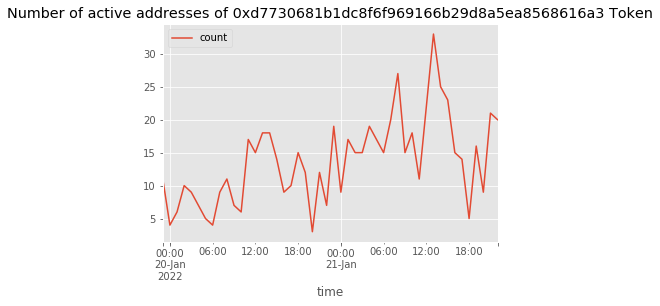

In [11]:
client.plot_active_addresses(
    contract="0xd7730681b1dc8f6f969166b29d8a5ea8568616a3",
    from_="2022-01-20",
    to="2022-01-22",
    resolution="H1",
    )
plt.show()

### Plotly

In [12]:
client.plot_active_addresses(
    contract="0xd7730681b1dc8f6f969166b29d8a5ea8568616a3",
    from_="2022-01-20",
    to="2022-01-22",
    resolution="H1",
    backend="plotly"
    )

### HvPlot

In [14]:
client.plot_active_addresses(
    contract="0xd7730681b1dc8f6f969166b29d8a5ea8568616a3",
    from_="2022-01-20",
    to="2022-01-22",
    resolution="H1",
    backend="hvplot",
    grid=True,
    )

:Curve   [time]   (count)